In [8]:
import torch
from torchvision import transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras

import warnings

import torch.utils.data
import torchvision
from torch.utils.data import Subset

from pathlib import Path
from PIL import Image, ImageOps

In [9]:
df = pd.read_csv('A_Z Handwritten Data.csv')

In [10]:
df.shape

(372450, 785)

In [11]:
df.head(25)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = df['0']

In [13]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

<AxesSubplot:ylabel='0'>

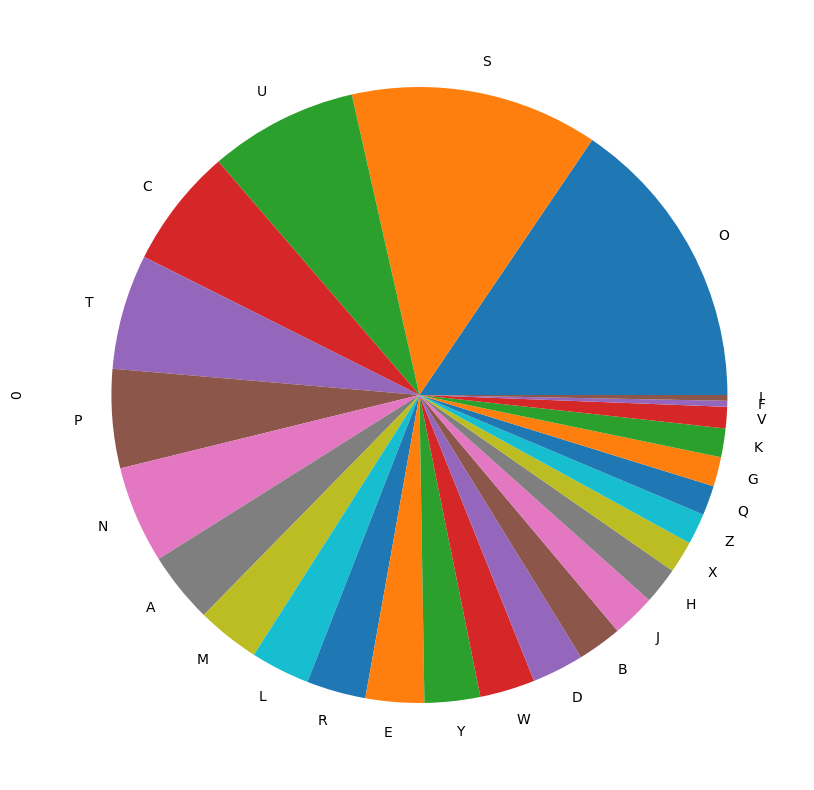

In [14]:
x.value_counts().plot(kind='pie',figsize=(10,10))

In [15]:
y_data = df['0']
y_data

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [19]:
df['0'] = x

In [20]:
aa = df.loc[df['0'] == 'E']
aa

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
56080,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56081,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56082,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56083,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56084,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67515,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67516,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67517,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67518,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
xx = aa.drop(['0'],axis=1)



xx = np.array(xx, dtype=float)
xx = xx.reshape(-1,28,28)
# #xx = xx / 255.0


In [18]:
counter = 0
for image in xx:
    im = Image.fromarray(image.astype('uint8'))
    inverted_image = ImageOps.invert(im)
    rotated = transforms.functional.vflip(inverted_image)
    rotated.save('dataset/and/'+str(counter)+'.jpg')
    counter+=1

    #x_image = x_image.unsqueeze(0).float()
    #x_image = x_image.to(device)

#x = x.reshape(-1,1,28,28)

In [ ]:
# достаем отсюда буквы A(обычную и превернутую вверх ногами - forall) 
# W  - ОМЕГА
# E - ЗЕРКАЛИМ ПО горизонали - exists
# V - обычную и переевернутую - and or

In [9]:
X_data = df.drop(['0'],axis=1)
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_data = X_data / 255.0
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


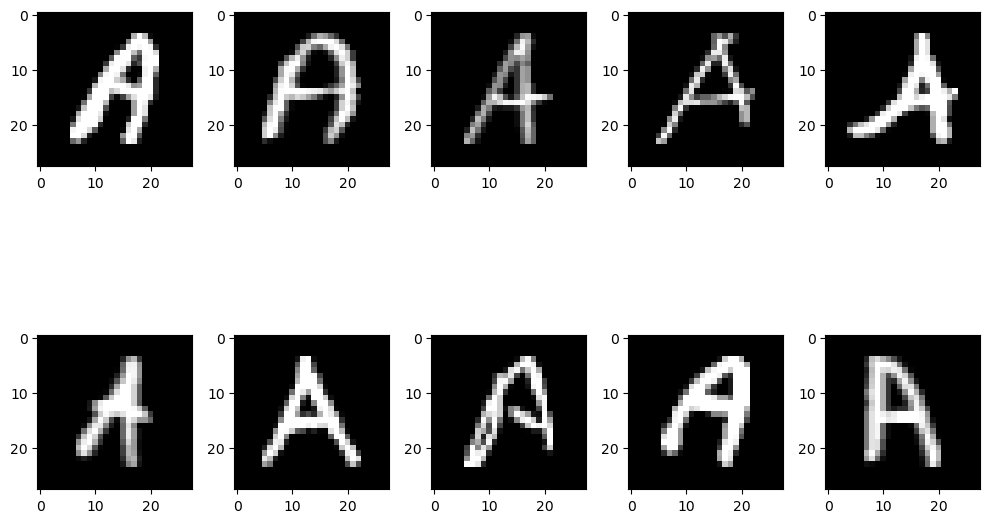

In [11]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1,1,28,28)

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()
    

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.08 ,random_state=42)
#y_train
X_train.shape

(342654, 1, 28, 28)

In [13]:
X_test.shape

(29796, 1, 28, 28)

In [12]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2_1 = torch.nn.Conv2d(
            in_channels=6, out_channels=12, kernel_size=3, padding=0)
        self.conv2_2 = torch.nn.Conv2d(
            in_channels=12, out_channels=16, kernel_size=3, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 26)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2_1(x)
        x = self.conv2_2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x

In [13]:
lenet5 = LeNet5()

In [14]:
#CUDA_LAUNCH_BLOCKING=1
torch.cuda.empty_cache()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
model = lenet5.to(device)

In [15]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-4)

In [17]:
X_test = torch.from_numpy(X_test).float().to(device)
X_train = torch.from_numpy(X_train).float()
X_test.shape

torch.Size([29796, 1, 28, 28])

In [18]:
#X_train = torch.from_numpy(X_train).float()

In [19]:
y_test = torch.from_numpy(y_test.values).long().to(device)
y_train = torch.from_numpy(y_train.values).long()



In [20]:
y_train.shape

torch.Size([342654])

In [21]:
X_train.shape

torch.Size([342654, 1, 28, 28])

In [22]:

def train(bat_sz, epoch_range, X_train, X_test, y_train, y_test, model):
    batch_size = bat_sz
    test_accuracy_history = []
    test_loss_history = []
    

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_range):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = model.forward(X_batch) 

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        with torch.no_grad():
            test_preds = lenet5.forward(X_test)
            test_loss_history.append(loss(test_preds, y_test).data.cpu())

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
            test_accuracy_history.append(accuracy)

            print(accuracy)
    
    plt.plot(test_accuracy_history,label='accuray')
    plt.plot(test_loss_history,label='loss')
    plt.legend(loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('%')

tensor(0.9437)
tensor(0.9675)
tensor(0.9767)
tensor(0.9795)
tensor(0.9829)
tensor(0.9832)
tensor(0.9843)
tensor(0.9859)
tensor(0.9864)
tensor(0.9888)
tensor(0.9879)
tensor(0.9883)
tensor(0.9904)
tensor(0.9904)
tensor(0.9914)
tensor(0.9909)


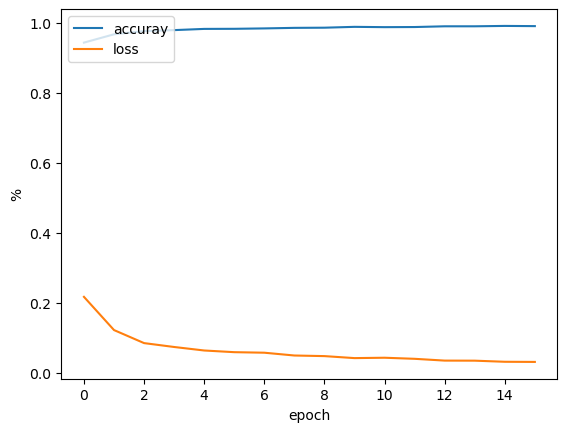

In [23]:
train(40, 16, X_train, X_test, y_train, y_test, model)

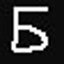

In [24]:
from PIL import Image, ImageOps
img = Image.open("2test.jpg")#X_train[0, :, :]  "2test.jpg"  

img = img.convert('L')
img = ImageOps.invert(img)
display(img.resize((64,64)))

In [25]:
convert_tensor = transforms.ToTensor()

x_image = convert_tensor(img)#X_train[0, :, :]
x_image = x_image.unsqueeze(0).float()
x_image.shape
#x_image

torch.Size([1, 1, 28, 28])

In [26]:
#x_image = x_image.unsqueeze(1).float()
x_image = x_image.float()
x_image = x_image.to(device)

In [27]:
y_pred = model(x_image)
y_pred * 10

tensor([[-3.3790e+01,  1.0314e+02, -2.8131e+01,  2.6568e+01,  8.5031e+01,
          3.7821e+01,  4.4784e+01, -1.3918e+01,  2.0845e-02, -7.2825e+00,
         -3.1123e+01, -2.6565e+01, -4.2699e+01, -4.2900e+00,  2.6143e+01,
         -3.2733e+01, -1.9433e+00, -2.4024e+00,  2.8652e+01, -5.3784e+01,
         -1.7146e+01, -2.0608e+01, -8.1206e+00, -4.0766e+01, -3.5763e+01,
         -3.0332e+01]], device='cuda:0', grad_fn=<MulBackward0>)

In [28]:
chr(ord('A')+y_pred.argmax().item())

'B'

In [34]:
torch.save(model.state_dict(), 'models/az1.ml')

<bound method Module.parameters of Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))>